In [1]:
# E-Commerce Sales Data Analysis

## Objective
This notebook analyzes simulated e-commerce sales data.
We generate unique data using my roll number as the random seed,
clean the data, perform statistical analysis, and create visual insights.

Roll Number: 902503033

SyntaxError: invalid syntax (1826455621.py, line 4)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [3]:
ROLL_NUMBER = 902503033   # 🔁 Replace with your roll number
np.random.seed(ROLL_NUMBER)

In [4]:
n = 1000  # number of transactions

data = pd.DataFrame({
    "Order_ID": range(1, n+1),
    "Product_Category": np.random.choice(
        ["Electronics", "Clothing", "Home", "Sports", "Books"], n
    ),
    "Price": np.random.normal(500, 200, n).round(2),
    "Quantity": np.random.randint(1, 5, n),
    "Discount": np.random.uniform(0, 0.3, n).round(2),
    "Region": np.random.choice(
        ["North", "South", "East", "West"], n
    ),
})


data["Price"] = data["Price"].abs()

# Calculate total sales
data["Total_Sales"] = data["Price"] * data["Quantity"] * (1 - data["Discount"])

data.head()

,Order_ID,Product_Category,Price,Quantity,Discount,Region,Total_Sales
0,1,Sports,180.93,3,0.23,South,417.9483
1,2,Clothing,192.45,4,0.28,South,554.2560
2,3,Electronics,1049.64,2,0.06,South,1973.3232
3,4,Sports,623.95,3,0.21,East,1478.7615
4,5,Home,421.14,1,0.25,East,315.8550


In [5]:
print(data.isnull().sum())

# Check duplicates
print("Duplicate Rows:", data.duplicated().sum())

# Basic info
data.info()

Order_ID            0
Product_Category    0
Price               0
Quantity            0
Discount            0
Region              0
Total_Sales         0
dtype: int64
Duplicate Rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          1000 non-null   int64  
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Quantity          1000 non-null   int32  
 4   Discount          1000 non-null   float64
 5   Region            1000 non-null   object 
 6   Total_Sales       1000 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 50.9+ KB


In [6]:
# Summary statistics
data.describe()

,Order_ID,Price,Quantity,Discount,Total_Sales
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,488.838390,2.483000,0.150050,1041.314953
std,288.819436,194.061649,1.106768,0.085342,662.301722
min,1.000000,9.590000,1.000000,0.000000,7.288400
25%,250.750000,363.892500,2.000000,0.080000,491.600000
50%,500.500000,491.465000,2.000000,0.150000,948.239450
75%,750.250000,619.867500,3.000000,0.230000,1448.477100
max,1000.000000,1066.930000,4.000000,0.300000,3587.400000


In [9]:
# Sales by category
category_sales = data.groupby("Product_Category")["Total_Sales"].sum()
category_sales

Product_Category
Books          190503.9455
Clothing       192980.3366
Electronics    220542.6436
Home           217136.4917
Sports         220151.5353
Name: Total_Sales, dtype: float64

In [10]:
region_sales = data.groupby("Region")["Total_Sales"].sum()
region_sales

Region
East     279182.9734
North    246844.4326
South    264351.6900
West     250935.8567
Name: Total_Sales, dtype: float64

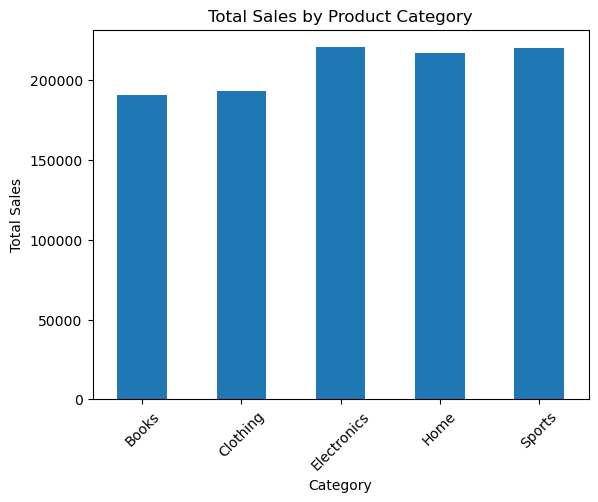

In [11]:
plt.figure()
category_sales.plot(kind="bar")
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

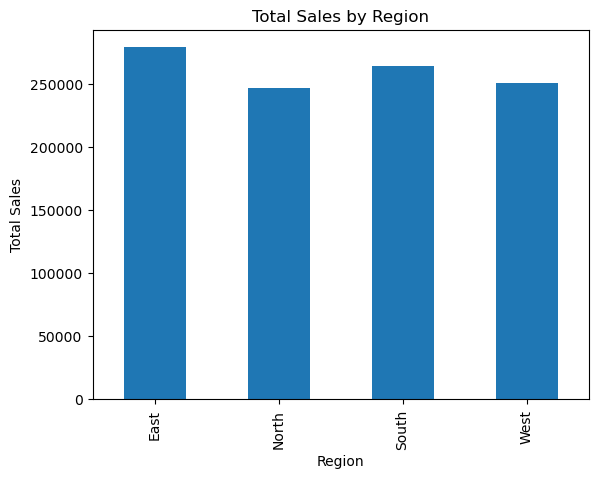

In [12]:
plt.figure()
region_sales.plot(kind="bar")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

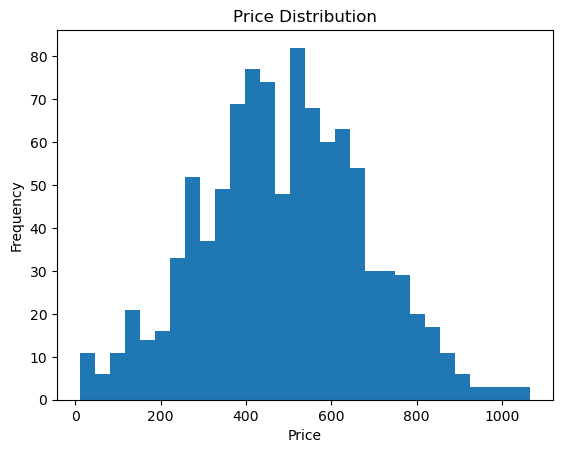

In [13]:
plt.figure()
plt.hist(data["Price"], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [14]:
correlation = data[["Price", "Quantity", "Discount", "Total_Sales"]].corr()
correlation

,Price,Quantity,Discount,Total_Sales
Price,1.000000,0.058932,0.026629,0.655234
Quantity,0.058932,1.000000,0.005997,0.718844
Discount,0.026629,0.005997,1.000000,-0.136693
Total_Sales,0.655234,0.718844,-0.136693,1.000000


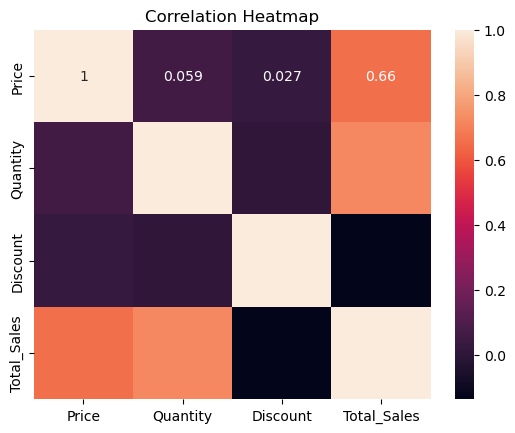

In [15]:
plt.figure()
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
import numpy as np
import pandas as pd

In [17]:
ROLL_NUMBER = 902503033   # Replace with your roll number
np.random.seed(ROLL_NUMBER)

In [18]:
# Generate random sales data (integers between 1000 and 5000)
sales_data = np.random.randint(1000, 5001, size=(12, 4))

sales_data

array([[4091, 2423, 2151, 4481],
       [1128, 3493, 1802, 3722],
       [3067, 2323, 3913, 1049],
       [3711, 3625, 2062, 1564],
       [4618, 2901, 1110, 2389],
       [2310, 3308, 3953, 3215],
       [1937, 1629, 2565, 1772],
       [2861, 4729, 1395, 4523],
       [4565, 1093, 1951, 1064],
       [3515, 3611, 4848, 1318],
       [1017, 1214, 4039, 1482],
       [1289, 4957, 2091, 4795]])

In [19]:
# Define column names
columns = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]

# Define month index
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert to DataFrame
sales_df = pd.DataFrame(sales_data, columns=columns, index=months)

sales_df

,Electronics,Clothing,Home & Kitchen,Sports
Jan,4091,2423,2151,4481
Feb,1128,3493,1802,3722
Mar,3067,2323,3913,1049
Apr,3711,3625,2062,1564
May,4618,2901,1110,2389
Jun,2310,3308,3953,3215
Jul,1937,1629,2565,1772
Aug,2861,4729,1395,4523
Sep,4565,1093,1951,1064
Oct,3515,3611,4848,1318


In [20]:
# Part II: Sales Analysis & Processing

In this section we:
1. Display first 5 rows and summary statistics
2. Calculate total sales per category and per month
3. Compute average sales growth between consecutive months
4. Add Total Sales and Growth Rate columns
5. Apply randomized discount based on roll number

SyntaxError: invalid syntax (308335627.py, line 3)

In [21]:
# First 5 rows
sales_df.head()

,Electronics,Clothing,Home & Kitchen,Sports
Jan,4091,2423,2151,4481
Feb,1128,3493,1802,3722
Mar,3067,2323,3913,1049
Apr,3711,3625,2062,1564
May,4618,2901,1110,2389


In [22]:
# Summary statistics
sales_df.describe()

,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,2842.416667,2942.166667,2656.666667,2614.500000
std,1304.685922,1257.275469,1210.625333,1450.719163
min,1017.000000,1093.000000,1110.000000,1049.000000
25%,1775.000000,2149.500000,1913.750000,1441.000000
50%,2964.000000,3104.500000,2121.000000,2080.500000
75%,3806.000000,3614.500000,3923.000000,3911.750000
max,4618.000000,4957.000000,4848.000000,4795.000000


In [23]:
total_per_category = sales_df.sum()
total_per_category

Electronics       34109
Clothing          35306
Home & Kitchen    31880
Sports            31374
dtype: int64

In [24]:
total_per_month = sales_df.sum(axis=1)
total_per_month

Jan    13146
Feb    10145
Mar    10352
Apr    10962
May    11018
Jun    12786
Jul     7903
Aug    13508
Sep     8673
Oct    13292
Nov     7752
Dec    13132
dtype: int64

In [25]:
# Percentage change month-to-month
growth = sales_df.pct_change()

# Average growth per category
average_growth = growth.mean() * 100

average_growth

Electronics       10.792957
Clothing          54.158363
Home & Kitchen    27.843366
Sports            31.038014
dtype: float64

In [26]:
sales_df["Total Sales"] = sales_df.sum(axis=1)

sales_df.head()

,Electronics,Clothing,Home & Kitchen,Sports,Total Sales
Jan,4091,2423,2151,4481,13146
Feb,1128,3493,1802,3722,10145
Mar,3067,2323,3913,1049,10352
Apr,3711,3625,2062,1564,10962
May,4618,2901,1110,2389,11018


In [27]:
sales_df["Growth Rate"] = sales_df["Total Sales"].pct_change() * 100

sales_df

,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate
Jan,4091,2423,2151,4481,13146,NaN
Feb,1128,3493,1802,3722,10145,-22.828237
Mar,3067,2323,3913,1049,10352,2.040414
Apr,3711,3625,2062,1564,10962,5.892581
May,4618,2901,1110,2389,11018,0.510856
Jun,2310,3308,3953,3215,12786,16.046469
Jul,1937,1629,2565,1772,7903,-38.190208
Aug,2861,4729,1395,4523,13508,70.922435
Sep,4565,1093,1951,1064,8673,-35.793604
Oct,3515,3611,4848,1318,13292,53.257235


In [28]:
if ROLL_NUMBER % 2 == 0:
    print("Roll number is EVEN → Applying 10% discount to Electronics")
    sales_df["Electronics"] *= 0.90
else:
    print("Roll number is ODD → Applying 15% discount to Clothing")
    sales_df["Clothing"] *= 0.85

sales_df.head()

Roll number is ODD → Applying 15% discount to Clothing


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate
Jan,4091,2059.55,2151,4481,13146,NaN
Feb,1128,2969.05,1802,3722,10145,-22.828237
Mar,3067,1974.55,3913,1049,10352,2.040414
Apr,3711,3081.25,2062,1564,10962,5.892581
May,4618,2465.85,1110,2389,11018,0.510856


In [29]:
sales_df["Total Sales"] = sales_df[["Electronics",
                                    "Clothing",
                                    "Home & Kitchen",
                                    "Sports"]].sum(axis=1)

sales_df.head()

,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate
Jan,4091,2059.55,2151,4481,12782.55,NaN
Feb,1128,2969.05,1802,3722,9621.05,-22.828237
Mar,3067,1974.55,3913,1049,10003.55,2.040414
Apr,3711,3081.25,2062,1564,10418.25,5.892581
May,4618,2465.85,1110,2389,10582.85,0.510856


In [30]:
# Part III: Data Visualization

In this section we:
1. Plot monthly sales trends for each category using line plots.
2. Create box plots to show the sales distribution for each category.

SyntaxError: invalid syntax (4260775977.py, line 3)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

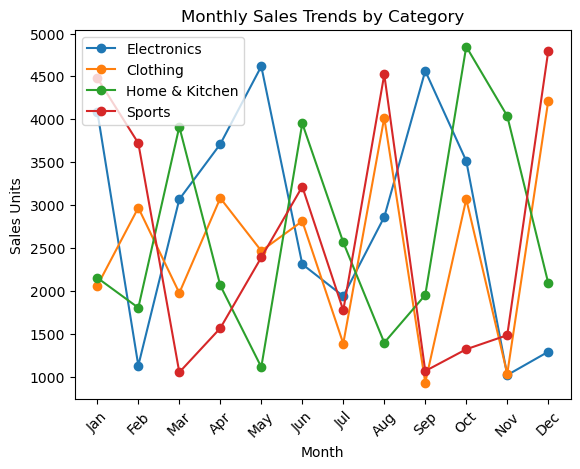

In [32]:
plt.figure()

categories = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]

for category in categories:
    plt.plot(sales_df.index, sales_df[category], marker='o', label=category)

plt.title("Monthly Sales Trends by Category")
plt.xlabel("Month")
plt.ylabel("Sales Units")
plt.legend()
plt.xticks(rotation=45)
plt.show()

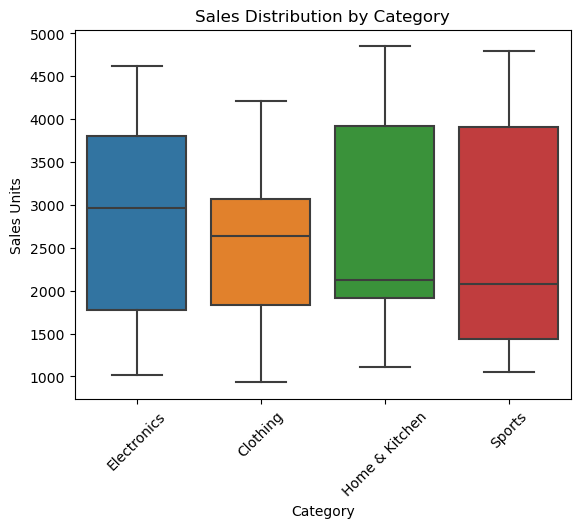

In [33]:
plt.figure()

sns.boxplot(data=sales_df[["Electronics", 
                           "Clothing", 
                           "Home & Kitchen", 
                           "Sports"]])

plt.title("Sales Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Sales Units")
plt.xticks(rotation=45)
plt.show()